<a href="https://colab.research.google.com/github/ferris77/my_notebooks/blob/main/python_alura/08-website_navigation_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A base de dados indica:
  Cada linha -> um site a ser criado
  Coluna não finalizado -> site foi pego e não finalizado
  Coluna horas esperadas -> quantidade de horas esperadas para o projeto
  Colunas preço -> valor cobrado pelas horas esperadas

Com estas informações, podemos criar uma funcionalidade para o nosso site de modo que caso alguém cadastre um novo projeto, com base na quantidade de horas esperadas e preço, indique baseado no histórico se é esperado que o projeto seja finalizado ou não. Caso seja esperado que o projeto não seja finalizado, podemos alertar o usuário para pagar mais ou simplificar (menos horas)

In [ ]:
import pandas as pd
import seaborn as sns
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
mapa = {
    "unfinished" : "nao_finalizado",
    "expected_hours" : "horas_esperadas",
    "price" : "preco"
}

dados = dados.rename(columns = mapa)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
troca = {
    0 : 1,
    1 : 0
} #dicionário para trocar os dados da coluna nao_finalizado, pois é preferível trabalhar com informações imples (finalizado True ou finalizado False)

dados['finalizado'] = dados.nao_finalizado.map(troca) #adiciona uma coluna finalizado, com valor conforme troca
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


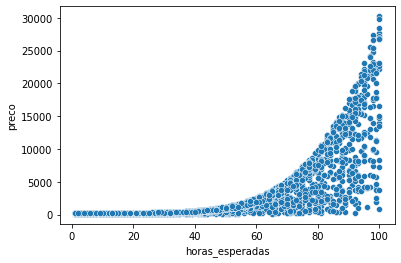

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preco', data = dados)

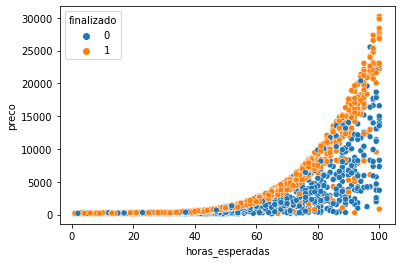

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preco', data = dados, hue = 'finalizado')

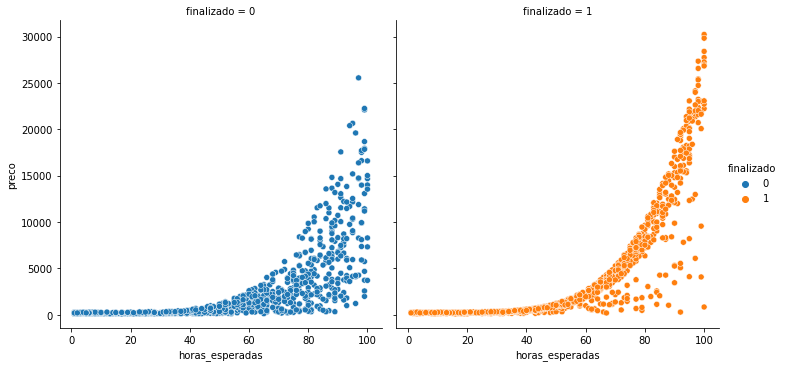

In [ ]:
sns.relplot(x='horas_esperadas', y='preco', data = dados, hue = 'finalizado', col = 'finalizado')

In [ ]:
x = dados[['horas_esperadas', 'preco']]
y = dados[['finalizado']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 1

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state = SEED,
                                                        test_size = 0.25,
                                                        stratify = y)

print(f'Treinaremos com {len(treino_x)} amostras e testaremos com {len(teste_x)} amostras.')

modelo = LinearSVC(random_state=SEED)
modelo.fit(treino_x, treino_y.values.ravel())
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acurácia foi de {acuracia:.2f}%')

Treinaremos com 1617 amostras e testaremos com 540 amostras.
A acurácia foi de 47.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import numpy as np
previsoes_de_base = np.ones(540)
minha_acuracia = accuracy_score(teste_y, previsoes_de_base)*100
print(f'Minhas previsoes chutando tudo como "finalizado" foi {minha_acuracia:.2f}%, {(minha_acuracia-acuracia):.2f}% a mais comparado com a previsao do modelo.')

Minhas previsoes chutando tudo como "finalizado" foi 52.59%, 5.19% a mais comparado com a previsao do modelo.


In [ ]:
teste_y

,finalizado
1159,1
334,0
519,1
985,1
666,1
...,...
456,0
926,1
89,1
1430,1


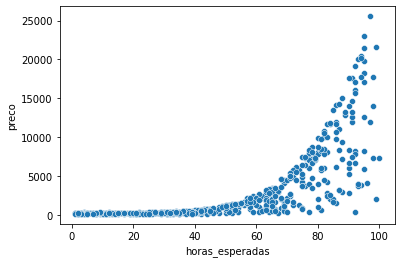

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preco', data = teste_x )

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 25545


In [ ]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)

In [ ]:
pixels = 100
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.529056e+04],
       [9.802000e+01, 2.529056e+04],
       [9.901000e+01, 2.529056e+04]])

In [ ]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

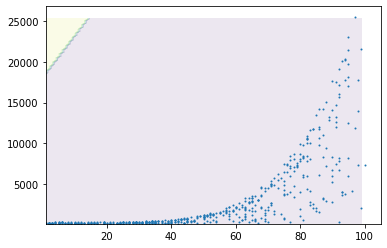

In [ ]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha = 0.1)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, s=1)

Vamos tentar usar o SVC, sem linear

Treinaremos com 1617 amostras e testaremos com 540 amostras.
A acurácia foi de 57.96%
Minhas previsoes chutando tudo como "finalizado" foi 52.59%, -5.37% a mais comparado com a previsao do modelo.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


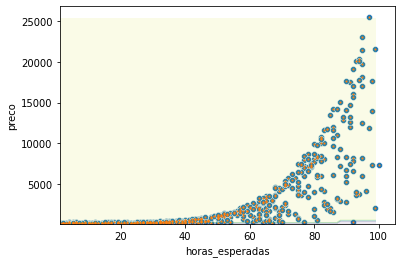

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 1
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)

print(f'Treinaremos com {len(treino_x)} amostras e testaremos com {len(teste_x)} amostras.')

modelo = LinearSVC()
modelo.fit(treino_x, treino_y.values.ravel())
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acurácia foi de {acuracia:.2f}%')

previsoes_de_base = np.ones(540)
minha_acuracia = accuracy_score(teste_y, previsoes_de_base)*100
print(f'Minhas previsoes chutando tudo como "finalizado" foi {minha_acuracia:.2f}%, {(minha_acuracia-acuracia):.2f}% a mais comparado com a previsao do modelo.')

sns.scatterplot(x='horas_esperadas', y='preco', data = teste_x )

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha = 0.1)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, s=1)

Treinaremos com 1617 amostras e testaremos com 540 amostras.
A acurácia foi de 68.33%
Minhas previsoes chutando tudo como "finalizado" foi 52.59%, -15.74% a mais comparado com a previsao do modelo.


AttributeError: ignored

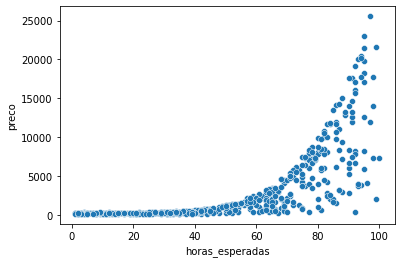

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 1
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)

print(f'Treinaremos com {len(treino_x)} amostras e testaremos com {len(teste_x)} amostras.')

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y.values.ravel())
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acurácia foi de {acuracia:.2f}%')

previsoes_de_base = np.ones(540)
minha_acuracia = accuracy_score(teste_y, previsoes_de_base)*100
print(f'Minhas previsoes chutando tudo como "finalizado" foi {minha_acuracia:.2f}%, {(minha_acuracia-acuracia):.2f}% a mais comparado com a previsao do modelo.')

sns.scatterplot(x='horas_esperadas', y='preco', data = raw_teste_x )

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha = 0.1)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, s=1)